# Weekly project 6
Today we will continue work from monday.
We will follow the style of last week.

Weekly project:
- You will need to implement your own k-means algorithm. (So you are not allowed to use the one in *sklearn*
- it should be able to cluster each of the different figures.
- Extend your k-means so it finds the optimal amount of clusters.
Challenge
- Implement the mean shift clustering algorithm


In [1]:
import numpy as np
import open3d as o3d
import copy
import matplotlib.pyplot as plt

def draw_labels_on_model(pcl, labels):
    cmap = plt.get_cmap("tab20")
    pcl_temp = copy.deepcopy(pcl)
    max_label = labels.max()
    colors = cmap(labels / (max_label if max_label > 0 else 1))
    colors[labels < 0] = 0
    pcl_temp.colors = o3d.utility.Vector3dVector(colors[:, :3])
    o3d.visualization.draw_geometries([pcl_temp])

d = 4
mesh = o3d.geometry.TriangleMesh.create_tetrahedron().translate((-d, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_octahedron().translate((0, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_icosahedron().translate((d, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_torus().translate((-d, -d, 0))
mesh += o3d.geometry.TriangleMesh.create_mobius(twists=1).translate((0, -d, 0))
mesh += o3d.geometry.TriangleMesh.create_mobius(twists=2).translate((d, -d, 0))

## apply k means on this
point_cloud = mesh.sample_points_uniformly(int(1e3))

o3d.visualization.draw_geometries([point_cloud])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def KMeans(mesh_points, num_of_centroids=6):
    counter = 0
    max_counter = 50
    # range_of_mesh = np.array([3, 3, 1])
    range_of_mesh = np.max(mesh_points, axis=0)
    centroids = [ np.random.rand(3)-0.5 for _ in range(num_of_centroids)]
    for c in centroids:
        for j in range(range_of_mesh.shape[0]):
            c[j] *= range_of_mesh[j]/2

    new_centroids = [ np.zeros(3)-0.5 for _ in range(num_of_centroids)]
    diff = [0 for _ in range(num_of_centroids)]
    mesh_cluster = np.zeros(mesh_points.shape[0])
    while(1):
        for i in range(mesh_points.shape[0]):
            #Assign each observation to the cluster
            for j in range(num_of_centroids):
                diff[j] = np.sum(np.absolute(mesh_points[i] - centroids[j]))
            mesh_cluster[i] = np.argmin(diff)

        #new cluster
        for i in range(num_of_centroids):
            new_centroids[i] = np.mean(mesh_points[mesh_cluster == i], axis=0)

        counter_of_equal_centroids = 0
        for c in range(num_of_centroids):
            if(np.sum((new_centroids[c] == centroids[c])) == 0):
                counter_of_equal_centroids += 1

        counter += 1

        if (counter_of_equal_centroids == 0 or counter == max_counter):
            break
        else:
            
            for i in range(num_of_centroids):
                centroids[i] = copy.deepcopy(new_centroids[i])
                
    return mesh_cluster, centroids

point_labels, _ = KMeans(np.array(point_cloud.points))
draw_labels_on_model(point_cloud, point_labels)



In [13]:
error_list = []
max_k = 50
for k in range(1, max_k + 1):
    xyz = np.array(point_cloud.points)
    mesh_cluster, centroids = KMeans(xyz, num_of_centroids=k)
    error = 0
    for c in range(k):
        for p in xyz[mesh_cluster == c]:
            error += np.sum(np.power((p - centroids[c]), 2))
    error_list.append(error)
    print(f"Calculated {k} out of {max_k}")



Calculated 1 out of 50
Calculated 2 out of 50
Calculated 3 out of 50
Calculated 4 out of 50
Calculated 5 out of 50
Calculated 6 out of 50
Calculated 7 out of 50
Calculated 8 out of 50
Calculated 9 out of 50
Calculated 10 out of 50
Calculated 11 out of 50
Calculated 12 out of 50
Calculated 13 out of 50
Calculated 14 out of 50
Calculated 15 out of 50
Calculated 16 out of 50
Calculated 17 out of 50
Calculated 18 out of 50
Calculated 19 out of 50
Calculated 20 out of 50
Calculated 21 out of 50
Calculated 22 out of 50
Calculated 23 out of 50
Calculated 24 out of 50
Calculated 25 out of 50
Calculated 26 out of 50
Calculated 27 out of 50
Calculated 28 out of 50
Calculated 29 out of 50
Calculated 30 out of 50
Calculated 31 out of 50
Calculated 32 out of 50
Calculated 33 out of 50
Calculated 34 out of 50
Calculated 35 out of 50
Calculated 36 out of 50
Calculated 37 out of 50
Calculated 38 out of 50
Calculated 39 out of 50
Calculated 40 out of 50
Calculated 41 out of 50
Calculated 42 out of 50
C

In [14]:
print(error_list)

[18191.307731403846, 5939.485987027821, 4312.313178538513, 3011.2460056886166, 2911.05053133531, 1771.4562371128159, 1644.8181119932792, 1398.5970990420471, 1278.8563382379032, 1275.6038604854862, 1372.2511117587378, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


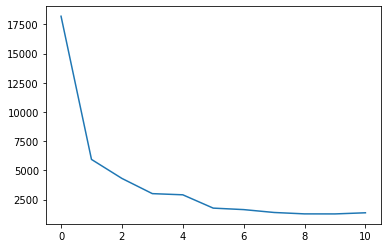

In [15]:
plt.figure()
plt.plot(error_list)